# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.12.0 opencv-python sklearn matplotlib
!pip install mediapipe==0.8.5

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) # Draw right hand connections

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully after 5 seconds if no key is pressed
        if cv2.waitKey(5000) == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [23]:
cap.release()
cv2.destroyAllWindows()

In [24]:
draw_landmarks(frame, results)

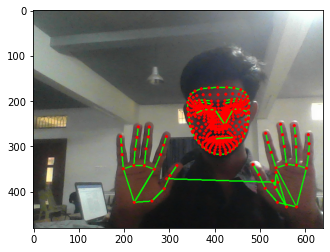

In [25]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [26]:
len(results.left_hand_landmarks.landmark)

21

In [27]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [28]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [29]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [30]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.66245914,  0.52684581, -0.88737881, ...,  0.30229041,
        0.58021754, -0.07058648])

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')

array([ 0.66245914,  0.52684581, -0.88737881, ...,  0.30229041,
        0.58021754, -0.07058648])

# 4. Setup Folders for Collection

In [35]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data') 

# # Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])

# # Thirty videos worth of data
# no_sequences = 30

# # Videos are going to be 30 frames in length
# sequence_length = 30

# # Folder start
# start_folder = 30
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

import os

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Create directories if they don't exist
for action in actions:
    if not os.path.exists(os.path.join(DATA_PATH, action)):
        os.makedirs(os.path.join(DATA_PATH, action))

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1
for action in actions: 
    dirmax = 0
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except ValueError:
        # ignore directories with non-integer names
        pass
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [36]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [37]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [100]:
actions = np.array(['hello', 'thanks', 'iloveyou'])

In [101]:
label_map = {label:num for num, label in enumerate(actions)}

In [102]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [103]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [43]:
np.array(labels).shape

(90,)

In [44]:
X = np.array(sequences)

In [45]:
X.shape

(90, 30, 1662)

In [46]:
y = to_categorical(labels).astype(int)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [51]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=700, callbacks=[tb_callback])

Epoch 1/700
3/3 [==============================] - 6s 153ms/step - loss: 9.5018 - categorical_accuracy: 0.3529
Epoch 2/700
3/3 [==============================] - 0s 134ms/step - loss: 30.5217 - categorical_accuracy: 0.3059
Epoch 3/700
3/3 [==============================] - 0s 137ms/step - loss: 22.3055 - categorical_accuracy: 0.4471
Epoch 4/700
3/3 [==============================] - 0s 134ms/step - loss: 75.1895 - categorical_accuracy: 0.3529
Epoch 5/700
3/3 [==============================] - 0s 135ms/step - loss: 23.7351 - categorical_accuracy: 0.3647
Epoch 6/700
3/3 [==============================] - 0s 138ms/step - loss: 32.3512 - categorical_accuracy: 0.3529
Epoch 7/700
3/3 [==============================] - 0s 136ms/step - loss: 29.4816 - categorical_accuracy: 0.3529
Epoch 8/700
3/3 [==============================] - 0s 143ms/step - loss: 30.6514 - categorical_accuracy: 0.2824
Epoch 9/700
3/3 [==============================] - 0s 140ms/step - loss: 29.8545 - categorical_accuracy: 

Epoch 74/700
3/3 [==============================] - 1s 185ms/step - loss: 0.7688 - categorical_accuracy: 0.6706
Epoch 75/700
3/3 [==============================] - 1s 186ms/step - loss: 0.6896 - categorical_accuracy: 0.6588
Epoch 76/700
3/3 [==============================] - 1s 184ms/step - loss: 0.6489 - categorical_accuracy: 0.6235
Epoch 77/700
3/3 [==============================] - 1s 189ms/step - loss: 0.7175 - categorical_accuracy: 0.6118
Epoch 78/700
3/3 [==============================] - 1s 192ms/step - loss: 0.6261 - categorical_accuracy: 0.8471
Epoch 79/700
3/3 [==============================] - 1s 194ms/step - loss: 0.7056 - categorical_accuracy: 0.8235
Epoch 80/700
3/3 [==============================] - 0s 160ms/step - loss: 1.2011 - categorical_accuracy: 0.8118
Epoch 81/700
3/3 [==============================] - 1s 167ms/step - loss: 1.2640 - categorical_accuracy: 0.7647
Epoch 82/700
3/3 [==============================] - 1s 159ms/step - loss: 1.2725 - categorical_accuracy:

3/3 [==============================] - 1s 171ms/step - loss: 0.2401 - categorical_accuracy: 0.8588
Epoch 147/700
3/3 [==============================] - 1s 165ms/step - loss: 0.1949 - categorical_accuracy: 0.9059
Epoch 148/700
3/3 [==============================] - 0s 154ms/step - loss: 0.1901 - categorical_accuracy: 0.9294
Epoch 149/700
3/3 [==============================] - 0s 161ms/step - loss: 0.1820 - categorical_accuracy: 0.9412
Epoch 150/700
3/3 [==============================] - 1s 203ms/step - loss: 0.1787 - categorical_accuracy: 0.9059
Epoch 151/700
3/3 [==============================] - 1s 174ms/step - loss: 0.1507 - categorical_accuracy: 0.9412
Epoch 152/700
3/3 [==============================] - 1s 209ms/step - loss: 0.1433 - categorical_accuracy: 0.9529
Epoch 153/700
3/3 [==============================] - 1s 176ms/step - loss: 0.1426 - categorical_accuracy: 0.9412
Epoch 154/700
3/3 [==============================] - 1s 177ms/step - loss: 0.1355 - categorical_accuracy: 0.94

3/3 [==============================] - 0s 159ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 219/700
3/3 [==============================] - 1s 182ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 220/700
3/3 [==============================] - 0s 152ms/step - loss: 0.0085 - categorical_accuracy: 1.0000
Epoch 221/700
3/3 [==============================] - 0s 158ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 222/700
3/3 [==============================] - 0s 160ms/step - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 223/700
3/3 [==============================] - 0s 156ms/step - loss: 0.0082 - categorical_accuracy: 1.0000
Epoch 224/700
3/3 [==============================] - 0s 161ms/step - loss: 0.0081 - categorical_accuracy: 1.0000
Epoch 225/700
3/3 [==============================] - 0s 158ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 226/700
3/3 [==============================] - 0s 160ms/step - loss: 0.0074 - categorical_accuracy: 1.00

3/3 [==============================] - 1s 191ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 291/700
3/3 [==============================] - 1s 192ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 292/700
3/3 [==============================] - 1s 196ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 293/700
3/3 [==============================] - 1s 230ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 294/700
3/3 [==============================] - 1s 212ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 295/700
3/3 [==============================] - 1s 194ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 296/700
3/3 [==============================] - 1s 195ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 297/700
3/3 [==============================] - 1s 194ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 298/700
3/3 [==============================] - 1s 178ms/step - loss: 0.0025 - categorical_accuracy: 1.00

3/3 [==============================] - 1s 160ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 363/700
3/3 [==============================] - 0s 152ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 364/700
3/3 [==============================] - 1s 171ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 365/700
3/3 [==============================] - 1s 168ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 366/700
3/3 [==============================] - 0s 157ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 367/700
3/3 [==============================] - 0s 156ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 368/700
3/3 [==============================] - 0s 162ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 369/700
3/3 [==============================] - 0s 163ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 370/700
3/3 [==============================] - 1s 175ms/step - loss: 0.0014 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 163ms/step - loss: 9.9660e-04 - categorical_accuracy: 1.0000
Epoch 435/700
3/3 [==============================] - 0s 165ms/step - loss: 9.9123e-04 - categorical_accuracy: 1.0000
Epoch 436/700
3/3 [==============================] - 0s 156ms/step - loss: 9.8551e-04 - categorical_accuracy: 1.0000
Epoch 437/700
3/3 [==============================] - 1s 174ms/step - loss: 9.8034e-04 - categorical_accuracy: 1.0000
Epoch 438/700
3/3 [==============================] - 1s 163ms/step - loss: 9.7684e-04 - categorical_accuracy: 1.0000
Epoch 439/700
3/3 [==============================] - 1s 165ms/step - loss: 9.7218e-04 - categorical_accuracy: 1.0000
Epoch 440/700
3/3 [==============================] - 0s 158ms/step - loss: 9.6729e-04 - categorical_accuracy: 1.0000
Epoch 441/700
3/3 [==============================] - 0s 157ms/step - loss: 9.6125e-04 - categorical_accuracy: 1.0000
Epoch 442/700
3/3 [==============================] - 1s 163ms/step - loss: 9.5

3/3 [==============================] - 1s 241ms/step - loss: 7.2077e-04 - categorical_accuracy: 1.0000
Epoch 505/700
3/3 [==============================] - 1s 203ms/step - loss: 7.1903e-04 - categorical_accuracy: 1.0000
Epoch 506/700
3/3 [==============================] - 1s 165ms/step - loss: 7.1403e-04 - categorical_accuracy: 1.0000
Epoch 507/700
3/3 [==============================] - 1s 200ms/step - loss: 7.1110e-04 - categorical_accuracy: 1.0000
Epoch 508/700
3/3 [==============================] - 1s 200ms/step - loss: 7.0774e-04 - categorical_accuracy: 1.0000
Epoch 509/700
3/3 [==============================] - 1s 200ms/step - loss: 7.0561e-04 - categorical_accuracy: 1.0000
Epoch 510/700
3/3 [==============================] - 1s 167ms/step - loss: 7.0199e-04 - categorical_accuracy: 1.0000
Epoch 511/700
3/3 [==============================] - 1s 217ms/step - loss: 6.9967e-04 - categorical_accuracy: 1.0000
Epoch 512/700
3/3 [==============================] - 1s 184ms/step - loss: 6.9

3/3 [==============================] - 0s 154ms/step - loss: 5.4571e-04 - categorical_accuracy: 1.0000
Epoch 575/700
3/3 [==============================] - 0s 152ms/step - loss: 5.4222e-04 - categorical_accuracy: 1.0000
Epoch 576/700
3/3 [==============================] - 0s 165ms/step - loss: 5.4017e-04 - categorical_accuracy: 1.0000
Epoch 577/700
3/3 [==============================] - 1s 173ms/step - loss: 5.3819e-04 - categorical_accuracy: 1.0000
Epoch 578/700
3/3 [==============================] - 1s 161ms/step - loss: 5.3617e-04 - categorical_accuracy: 1.0000
Epoch 579/700
3/3 [==============================] - 1s 161ms/step - loss: 5.3577e-04 - categorical_accuracy: 1.0000
Epoch 580/700
3/3 [==============================] - 1s 165ms/step - loss: 5.3214e-04 - categorical_accuracy: 1.0000
Epoch 581/700
3/3 [==============================] - 0s 161ms/step - loss: 5.3089e-04 - categorical_accuracy: 1.0000
Epoch 582/700
3/3 [==============================] - 0s 161ms/step - loss: 5.2

3/3 [==============================] - 1s 168ms/step - loss: 4.2383e-04 - categorical_accuracy: 1.0000
Epoch 645/700
3/3 [==============================] - 1s 157ms/step - loss: 4.2235e-04 - categorical_accuracy: 1.0000
Epoch 646/700
3/3 [==============================] - 1s 165ms/step - loss: 4.2064e-04 - categorical_accuracy: 1.0000
Epoch 647/700
3/3 [==============================] - 1s 165ms/step - loss: 4.1936e-04 - categorical_accuracy: 1.0000
Epoch 648/700
3/3 [==============================] - 1s 169ms/step - loss: 4.1785e-04 - categorical_accuracy: 1.0000
Epoch 649/700
3/3 [==============================] - 0s 162ms/step - loss: 4.1645e-04 - categorical_accuracy: 1.0000
Epoch 650/700
3/3 [==============================] - 1s 180ms/step - loss: 4.1493e-04 - categorical_accuracy: 1.0000
Epoch 651/700
3/3 [==============================] - 1s 167ms/step - loss: 4.1371e-04 - categorical_accuracy: 1.0000
Epoch 652/700
3/3 [==============================] - 1s 176ms/step - loss: 4.1

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [76]:
res = model.predict(X_test)

1/1 [==============================] - 0s 41ms/step


In [77]:
actions[np.argmax(res[1])]

'hello'

In [78]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [79]:
model.save('action.h5')

In [80]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


In [83]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 1],
        [0, 0]],

       [[1, 0],
        [1, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [85]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [86]:
from scipy import stats

In [87]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob.item(0)*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if num < len(colors):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob.item(0)*100), 90+num*40), colors[num], -1)
        else:
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob.item(0)*100), 90+num*40), (255, 255, 255), -1)
        if num < len(actions):
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            
    return output_frame

In [88]:
print(len(colors))

3


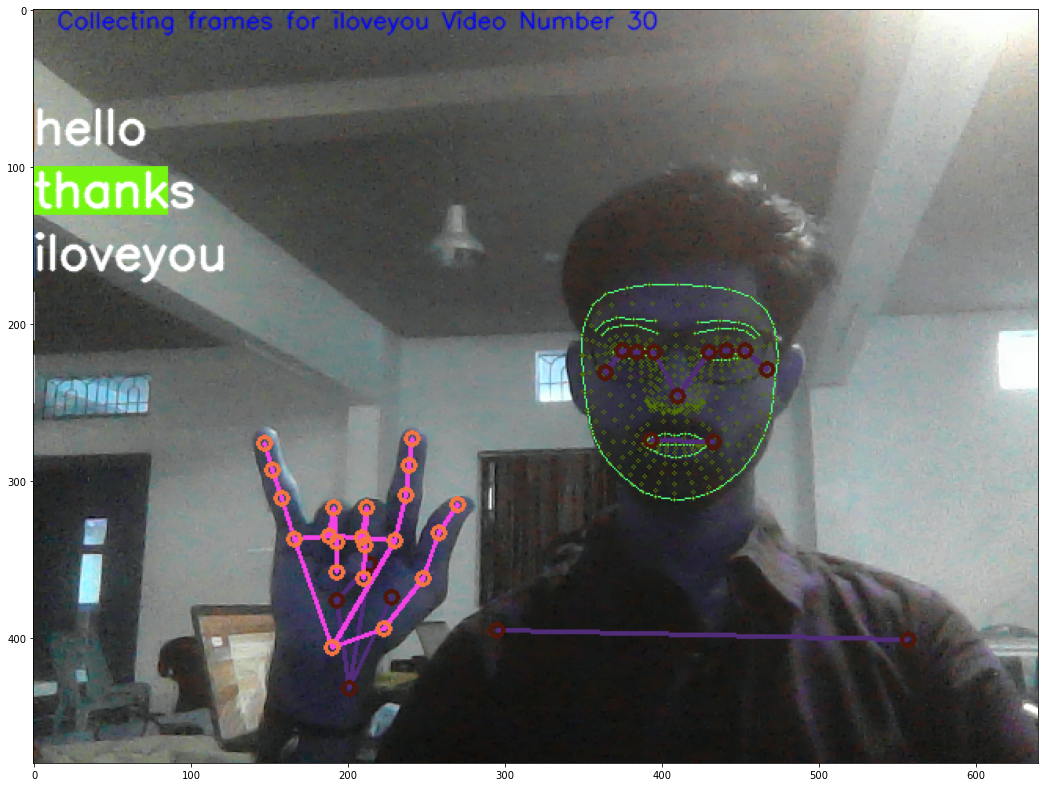

In [89]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [91]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 41ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 65ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.p

1/1 [==============================] - 0s 51ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'm

1/1 [==============================] - 0s 58ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

1/1 [==============================] - 0s 63ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<c

1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
thanks
<class 'me

1/1 [==============================] - 0s 41ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 69ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
hello
